# Quickstart

This quick introductory example demonstrates how to use `gwrefpy` to analyze an observation and a reference well, calibrate the two wells, and visualize the results.


In [1]:
import gwrefpy as gr
import pandas as pd
import numpy as np

In [2]:
dates = pd.date_range(start="2020-01-01", periods=365, freq="D")

obs_series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, 365)) + (np.random.normal(0, 0.1, 365) * 2), index=dates)
ref_series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, 365)) + np.random.normal(0, 0.1, 365), index=dates)

In [3]:

obs = gr.Well(name="Obs_well", is_reference=False, timeseries=obs_series)
ref = gr.Well(name="Ref_well", is_reference=True, timeseries=ref_series)

Added one well to model 'my first model'.
Added one well to model 'my first model'.
Plotting well: Obs_well
Plotting well: Ref_well


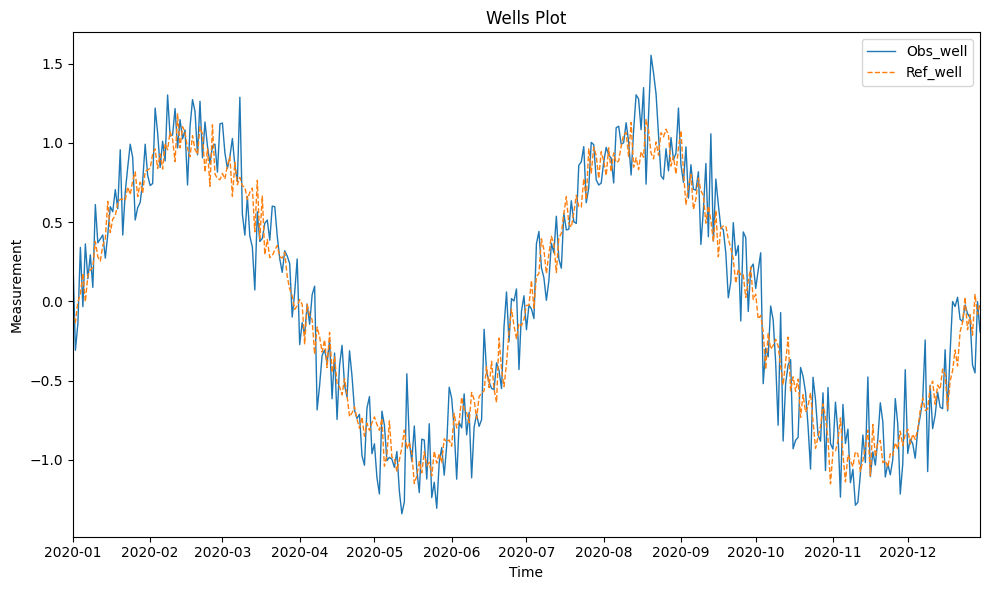

In [4]:
model = gr.Model(name="my first model")
model.add_well(obs)
model.add_well(ref)

fig, ax = model.plot_wells()
ax.legend()

In [5]:
model.fit(
    obs,
    ref,
    offset="0D"
)

Fit completed for model 'my first model' with RMSE 0.9553640994669527.
Fitting model 'my first model' using reference well 'Ref_well' and observation well 'Obs_well'.


Statistic,Value,Description
RMSE,0.9554,Root Mean Square Error
R²,0.9127,Coefficient of Determination
R-value,0.9554,Correlation Coefficient
Slope,1.0210,Linear Regression Slope
Intercept,0.0172,Linear Regression Intercept
P-value,0.0000,Statistical Significance
N,365,Number of Data Points
Std Error,0.2239,Standard Error
Confidence,95.0%,Confidence Level


Plotting fit: Obs_well ~ Ref_well
Plotting fit for well: Obs_well
Marking outliers for well: Obs_well


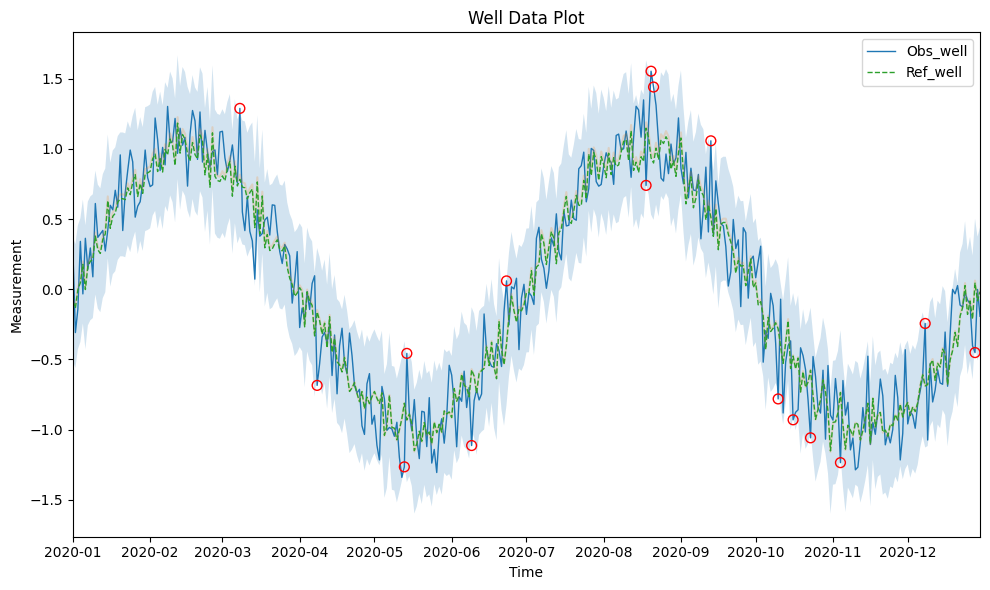

In [6]:
fig, ax = model.plot_fits()
ax.legend()